# Lab 5

### Import

In [38]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

import sys
sys.path.append("..")
import image_preprocessing



# from preprocessing import parse_aug_fn, parse_fn

In [ ]:
#for colab 

def flip(x):
    """
    flip image(翻轉影像)
    """
    x = tf.image.random_flip_left_right(x)  # 隨機左右翻轉影像
    return x

def color(x):
    """
     Color change(改變顏色)
    """
    x = tf.image.random_hue(x, 0.08)  # 隨機調整影像色調
    x = tf.image.random_saturation(x, 0.6, 1.6)  # 隨機調整影像飽和度
    x = tf.image.random_brightness(x, 0.05)  # 隨機調整影像亮度
    x = tf.image.random_contrast(x, 0.7, 1.3)  # 隨機調整影像對比度
    return x

def rotate(x):
    """
    Rotation image(影像旋轉)
    """
    # 隨機選轉n次(通過minval和maxval設定n的範圍)，每次選轉90度
    x = tf.image.rot90(x, tf.random.uniform(shape=[], minval=1, maxval=4, dtype=tf.int32))
    return x

def zoom(x, scale_min=0.6, scale_max=1.4):
    """
    Zoom Image(影像縮放)
    """
    h, w, c = x.shape
    scale = tf.random.uniform([], scale_min, scale_max)  # 隨機縮放比例
    sh = h * scale  # 縮放後影像長度
    sw = w * scale  # 縮放後影像寬度
    x = tf.image.resize(x, (sh, sw))  # 影像縮放
    x = tf.image.resize_with_crop_or_pad(x, h, w)  # 影像裁減和填補
    return x

def parse_aug_fn(dataset):
    """
    Image Augmentation(影像增強) function
    """
    x = tf.cast(dataset['image'], tf.float32) / 255.  # 影像標準化
    x = flip(x)  # 隨機水平翻轉
    # 觸發顏色轉換機率50%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.5, lambda: color(x), lambda: x)
    # 觸發影像旋轉機率0.25%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.75, lambda: rotate(x), lambda: x)
    # 觸發影像縮放機率50%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.5, lambda: zoom(x), lambda: x)
    # 將輸出標籤轉乘One-hot編碼
    y = tf.one_hot(dataset['label'], 10)
    return x, y

def parse_fn(dataset):
    x = tf.cast(dataset['image'], tf.float32) / 255.  # 影像標準化
    # 將輸出標籤轉乘One-hot編碼
    y = tf.one_hot(dataset['label'], 10)
    return x, y

## Activation Function 激活函數

1. ReLU

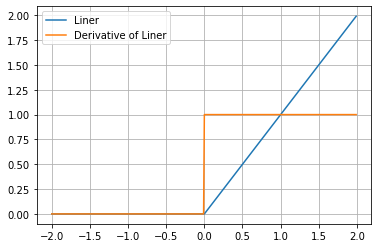

In [39]:
x = np.arange(-2, 2, 0.01)
y = np.where(x>0, x, 0)
plt.plot(x, y, label='Liner')
plt.grid(True)
x = np.arange(-2, 2, 0.01)
y = np.where(x>0, 1, 0)
plt.plot(x, y, label='Derivative of Liner')
plt.grid(True)
plt.legend(loc='upper left')

2. Sigmoid

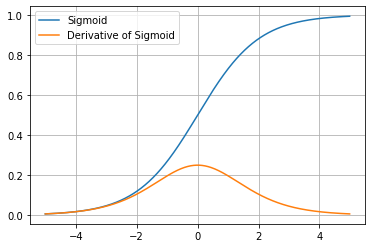

In [40]:
x1 = np.arange(-5, 5, 0.01)
y1 = 1 / (1 + np.exp(-x1))
plt.plot(x1, y1, label='Sigmoid')
plt.grid(True)
x2 = np.arange(-5, 5, 0.01)
y2 = (1 / (1 + np.exp(-x2))) * (1 - (1 / (1 + np.exp(-x2))))
plt.plot(x2, y2, label='Derivative of Sigmoid')
plt.grid(True)
plt.legend(loc='upper left')

3. Tanh

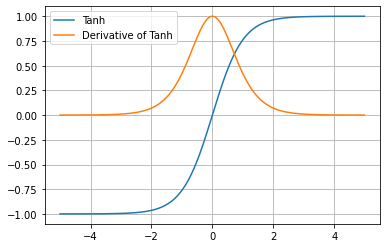

In [41]:
x = np.arange(-5, 5, 0.01)
y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
plt.plot(x, y, label='Tanh')
plt.grid(True)
x = np.arange(-5, 5, 0.01)
y = 1 - np.square((np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)))
plt.plot(x, y, label='Derivative of Tanh')
plt.grid(True)
plt.legend(loc='upper left')

## 權重初始化

1. RandomNormal (std 1 )

In [42]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x4)
model_1 = keras.Model(inputs, [x1, x2, x3, x4, x5])

4/4 [==============================] - 0s 1ms/step


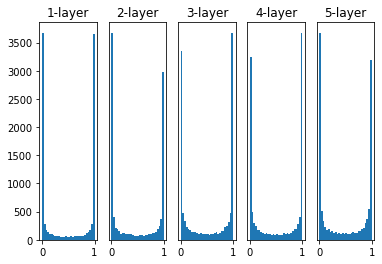

In [43]:
x = np.random.randn(100, 100)
outputs = model_1.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

2. RandomNormal (std 0.05 )

In [44]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x4)
model_2 = keras.Model(inputs, [x1, x2, x3, x4, x5])

4/4 [==============================] - 0s 1ms/step


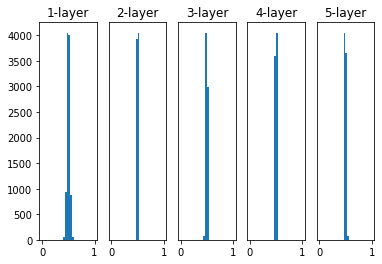

In [45]:
x = np.random.randn(100, 100)
outputs = model_2.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

3. Xavier/Glorot Initialization (Sigmoid)

In [46]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x4)
model_3 = keras.Model(inputs, [x1, x2, x3, x4, x5])

4/4 [==============================] - 0s 2ms/step


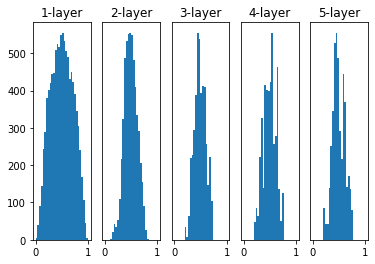

In [47]:
x = np.random.randn(100, 100)
outputs = model_3.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

4. Xavier/Glorot Initialization (ReLU)

In [48]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(inputs)
x2 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x1)
x3 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x2)
x4 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x3)
x5 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x4)
model_4 = keras.Model(inputs, [x1, x2, x3, x4, x5])

4/4 [==============================] - 0s 1000us/step


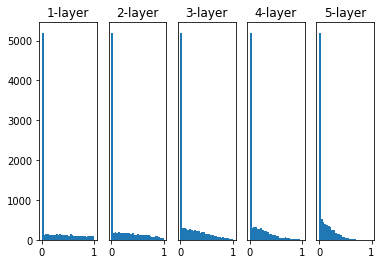

In [49]:
x = np.random.randn(100, 100)
outputs = model_4.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

5. He initialization

In [50]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'relu', False, initializers.he_normal())(inputs)
x2 = layers.Dense(100, 'relu', False, initializers.he_normal())(x1)
x3 = layers.Dense(100, 'relu', False, initializers.he_normal())(x2)
x4 = layers.Dense(100, 'relu', False, initializers.he_normal())(x3)
x5 = layers.Dense(100, 'relu', False, initializers.he_normal())(x4)
model_5 = keras.Model(inputs, [x1, x2, x3, x4, x5])

4/4 [==============================] - 0s 1ms/step


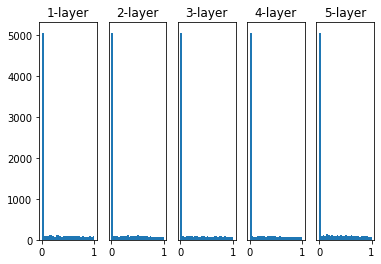

In [51]:
x = np.random.randn(100, 100)
outputs = model_5.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

# 實驗一：使用CIFAR-10數據集實驗證三種權重初始化方法

### Import必要套件

In [52]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers 

import sys
sys.path.append("..")
import image_preprocessing

# 從資料夾中的preprocessing.py檔案中Import parse_aug_fn和parse_fn函數
# from preprocessing import parse_aug_fn, parse_fn

### 讀取數據並分析
載入Cifar10數據集：

In [53]:
# 將train Data重新分成1:9等分，分別分給valid data, train data
valid_split, train_split = ['train[:90%]','train[90%:]']
# 取得訓練數據，並順便讀取data的資訊
train_data, info = tfds.load("cifar10", split=train_split, with_info=True)
# 取得驗證數據
valid_data = tfds.load("cifar10", split=valid_split)
# 取得測試數據
test_data = tfds.load("cifar10", split='test')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling ~\tensorflow_datasets\cifar10\3.0.2.incomplete0EMCR1\cifar10-train.tfrecord*...:   0%|          | 0/…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling ~\tensorflow_datasets\cifar10\3.0.2.incomplete0EMCR1\cifar10-test.tfrecord*...:   0%|          | 0/1…

Dataset cifar10 downloaded and prepared to ~\tensorflow_datasets\cifar10\3.0.2. Subsequent calls will reuse this data.


### Dataset 設定

In [54]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  # 自動調整模式
batch_size = 64  # 批次大小
train_num = int(info.splits['train'].num_examples / 10) * 9  # 訓練資料數量

train_data = train_data.shuffle(train_num)  # 打散資料集
# 載入預處理「 parse_aug_fn」function，cpu數量為自動調整模式
train_data = train_data.map(map_func=image_preprocessing.parse_aug_fn, num_parallel_calls=AUTOTUNE)
# train_data = train_data.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)

# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)
train_data = train_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# 載入預處理「 parse_fn」function，cpu數量為自動調整模式
valid_data = valid_data.map(map_func=image_preprocessing.parse_fn, num_parallel_calls=AUTOTUNE)
# valid_data = valid_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)

# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)
valid_data = valid_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# 載入預處理「 parse_fn」function，cpu數量為自動調整模式
test_data = test_data.map(map_func=image_preprocessing.parse_fn, num_parallel_calls=AUTOTUNE)
# test_data = test_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)

# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)
test_data = test_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

### 訓練網路模型

In [55]:
def build_and_train_model(run_name, init):
    """
    run_name:傳入目前執行的任務名子
    init:傳入網路層初始化化的方式
    """
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=init)(inputs)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu', kernel_initializer=init)(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    # 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
    model = keras.Model(inputs, outputs)
    
    # 儲存訓練記錄檔
    logfiles = 'lab5-logs/{}-{}'.format(run_name, init.__class__.__name__)
    model_cbk = keras.callbacks.TensorBoard(log_dir=logfiles, 
                                            histogram_freq=1)
    # 儲存最好的網路模型權重
    modelfiles = model_dir + '/{}-best-model.h5'.format(run_name)
    model_mckp = keras.callbacks.ModelCheckpoint(modelfiles, 
                                                 monitor='val_categorical_accuracy', 
                                                 save_best_only=True, 
                                                 mode='max')
    
    # 設定訓練使用的優化器、損失函數和指標函數
    model.compile(keras.optimizers.Adam(), 
               loss=keras.losses.CategoricalCrossentropy(), 
               metrics=[keras.metrics.CategoricalAccuracy()])
    
    # 訓練網路模型
    model.fit(train_data,
              epochs=100, 
              validation_data=valid_data,
              callbacks=[model_cbk, model_mckp])

In [56]:
session_num = 1
# 設定儲存權重目錄
model_dir = 'lab5-logs/models/'
try:
    os.makedirs(model_dir)
except:
    pass
# 設定要測試的三種初始化方法
weights_initialization_list = [initializers.RandomNormal(0, 0.01),
                        initializers.glorot_normal(),
                        initializers.he_normal()]

for init in weights_initialization_list:
    print('--- Running training session %d' % (session_num))
    run_name = "run-%d" % session_num
    build_and_train_model(run_name, init)  # 創建和訓練網路
    session_num += 1

--- Running training session 1
Epoch 1/100
79/79 [==============================] - 47s 586ms/step - loss: 2.2735 - categorical_accuracy: 0.1256 - val_loss: 2.1783 - val_categorical_accuracy: 0.1782
Epoch 2/100
78/79 [============================>.] - ETA: 0s - loss: 2.1880 - categorical_accuracy: 0.1671

KeyboardInterrupt: 

### 比較三種初始化的訓練結果

In [ ]:
model_1 = keras.models.load_model('lab5-logs/models/run-1-best-model.h5')
model_2 = keras.models.load_model('lab5-logs/models/run-2-best-model.h5')
model_3 = keras.models.load_model('lab5-logs/models/run-3-best-model.h5')
loss_1, acc_1 = model_1.evaluate(test_data)
loss_2, acc_2 = model_2.evaluate(test_data)
loss_3, acc_3 = model_3.evaluate(test_data)

    157/Unknown - 2s 10ms/step - loss: 0.6364 - categorical_accuracy: 0.8048 1s 9ms/ste

顯示預測的損失值與準確度結果：

In [ ]:
loss = [loss_1, loss_2, loss_3]  
acc = [acc_1, acc_2, acc_3]

dict = {"Loss": loss,  
        "Accuracy": acc}

df = pd.DataFrame(dict)
df

,Loss,Accuracy
0,0.854636,0.7060
1,0.654435,0.7946
2,0.636442,0.8048


# 實驗二：使用CIFAR-10數據集實驗Batch Normalization方法

建立網路模型，這邊使用到以下幾種網路層：
- keras.Input：輸入層(輸入影像大小為32x32x3)
- layers.Conv2D：卷積層(使用3x3大小的kernel)
- layers.BatchNormalization：BatchNormalization層(使用預設參數)
- layers.ReLU：ReLU激活函數層(使用在BatchNormalization層之後)
- layers.MaxPool2D：池化層(對特徵圖下採樣)
- layers.Flatten：扁平層(特徵圖轉成一維Tensor)
- layers.Dropout：Dropout層(每次訓練隨機丟棄50%網路)
- layers.Dense：全連接層(隱藏層使用ReLU激活函數，輸出層使用Softmax激活函數)

因為大部分激活函數都會在BatchNormalization之後，所以這邊的搭建與前幾個model有些差別。

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, (3, 3))(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(128, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(256, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(128, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(64, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Flatten()(x)
x = layers.Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)
# 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
model_4 = keras.Model(inputs, outputs, name='model-4')
model_4.summary()  # 顯示網路架構

Model: "model-4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 64)        256       
_________________________________________________________________
re_lu (ReLU)                 (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 128)       512 

建立Callback function：

In [ ]:
# 儲存訓練記錄檔
log_dir = os.path.join('lab5-logs', 'run-4-batchnormalization')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/run-4-best-model.h5', 
                                             monitor='val_categorical_accuracy', 
                                             save_best_only=True, 
                                             mode='max')

設定訓練使用的優化器、損失函數和指標函數

In [ ]:
model_4.compile(keras.optimizers.Adam(), 
               loss=keras.losses.CategoricalCrossentropy(), 
               metrics=[keras.metrics.CategoricalAccuracy()])

訓練網路模型

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=100, 
                        validation_data=valid_data,
                        callbacks=[model_cbk, model_mckp])

Epoch 1/100
704/704 [==============================] - 35s 50ms/step - loss: 1.8649 - categorical_accuracy: 0.3316 - val_loss: 0.0000e+00 - val_categorical_accuracy: 0.0000e+00
Epoch 2/100
704/704 [==============================] - 27s 39ms/step - loss: 1.5226 - categorical_accuracy: 0.4618 - val_loss: 1.6555 - val_categorical_accuracy: 0.4566
Epoch 3/100
704/704 [==============================] - 28s 40ms/step - loss: 1.3684 - categorical_accuracy: 0.5218 - val_loss: 1.2505 - val_categorical_accuracy: 0.5728
Epoch 4/100
704/704 [==============================] - 27s 38ms/step - loss: 1.2729 - categorical_accuracy: 0.5578 - val_loss: 1.1574 - val_categorical_accuracy: 0.5860
Epoch 5/100
704/704 [==============================] - 28s 39ms/step - loss: 1.1960 - categorical_accuracy: 0.5859 - val_loss: 1.4321 - val_categorical_accuracy: 0.5130
Epoch 6/100
704/704 [==============================] - 28s 39ms/step - loss: 1.1375 - categorical_accuracy: 0.6075 - val_loss: 1.0611 - val_categor

704/704 [==============================] - 16s 23ms/step - loss: 0.4111 - categorical_accuracy: 0.8665 - val_loss: 0.4669 - val_categorical_accuracy: 0.8660
Epoch 98/100
704/704 [==============================] - 16s 23ms/step - loss: 0.4177 - categorical_accuracy: 0.8646 - val_loss: 0.4314 - val_categorical_accuracy: 0.8632
Epoch 99/100
704/704 [==============================] - 16s 23ms/step - loss: 0.4173 - categorical_accuracy: 0.8634 - val_loss: 0.5266 - val_categorical_accuracy: 0.8440
Epoch 100/100
704/704 [==============================] - 16s 23ms/step - loss: 0.4050 - categorical_accuracy: 0.8680 - val_loss: 0.4620 - val_categorical_accuracy: 0.8510


驗證在測試集上：

In [ ]:
model_4 = keras.models.load_model('lab5-logs/models/run-4-best-model.h5')
loss, acc = model_4.evaluate(test_data)
print('\nModel-4 Accuracy: {}%'.format(acc))

    157/Unknown - 6s 39ms/step - loss: 0.4311 - categorical_accuracy: 0.8644
Model-4 Accuracy: 0.8644000291824341%


### 比較四種網路的訓練結果

In [ ]:
model_1 = keras.models.load_model('lab5-logs/models/run-1-best-model.h5')
model_2 = keras.models.load_model('lab5-logs/models/run-2-best-model.h5')
model_3 = keras.models.load_model('lab5-logs/models/run-3-best-model.h5')
model_4 = keras.models.load_model('lab5-logs/models/run-4-best-model.h5')
loss_1, acc_1 = model_1.evaluate(test_data)
loss_2, acc_2 = model_2.evaluate(test_data)
loss_3, acc_3 = model_3.evaluate(test_data)
loss_4, acc_4 = model_4.evaluate(test_data)

    157/Unknown - 2s 14ms/step - loss: 0.4311 - categorical_accuracy: 0.8644

In [ ]:
loss = [loss_1, loss_2, loss_3, loss_4]  
acc = [acc_1, acc_2, acc_3, acc_4]

dict = {"Loss": loss,  
        "Accuracy": acc}

df = pd.DataFrame(dict)
df

,Loss,Accuracy
0,0.854636,0.7060
1,0.654435,0.7946
2,0.636442,0.8048
3,0.431061,0.8644
